Dataset used is number of tourists over a period of time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "/content/data.csv"
df = pd.read_csv(file_path)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], origin='1899-12-30', unit='D')

In [5]:
df.set_index('Date', inplace=True)

In [13]:
df_monthly = df.resample('M').median()


<ipython-input-13-3cb6508a98ab>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').median()


In [14]:
df['Smoothed'] = df['TouristNumber'].rolling(window=7, center=True).mean()

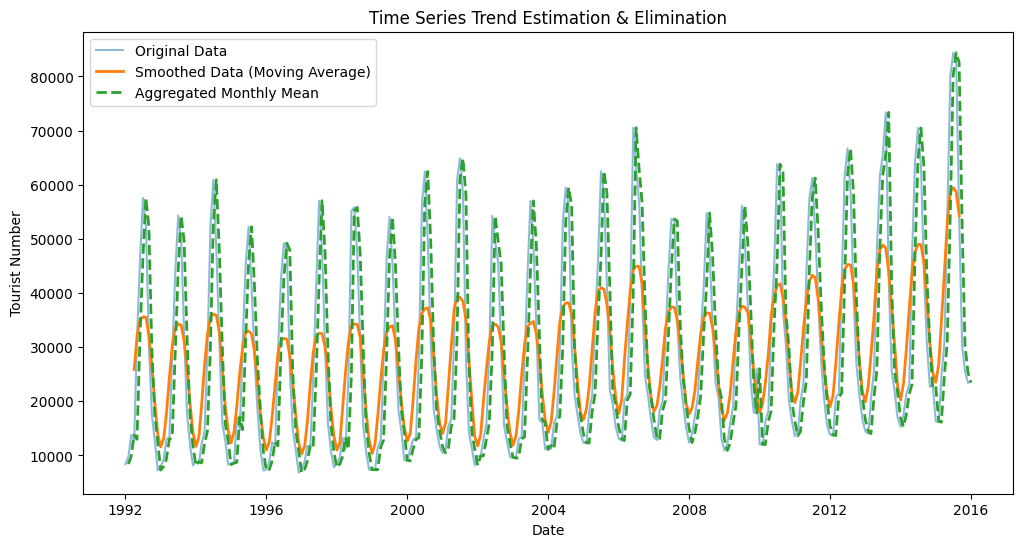

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['TouristNumber'], label='Original Data', alpha=0.5)
plt.plot(df.index, df['Smoothed'], label='Smoothed Data (Moving Average)', linewidth=2)
plt.plot(df_monthly.index, df_monthly['TouristNumber'], label='Aggregated Monthly Mean', linestyle='dashed', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Tourist Number')
plt.title('Time Series Trend Estimation & Elimination')
plt.legend()
plt.show()


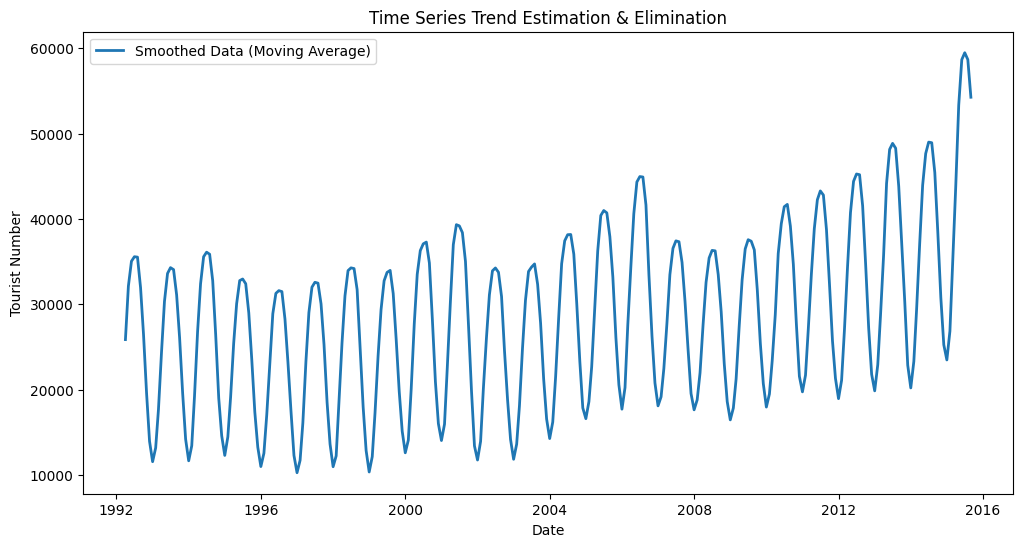

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Smoothed'], label='Smoothed Data (Moving Average)', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Tourist Number')
plt.title('Time Series Trend Estimation & Elimination')
plt.legend()
plt.show()


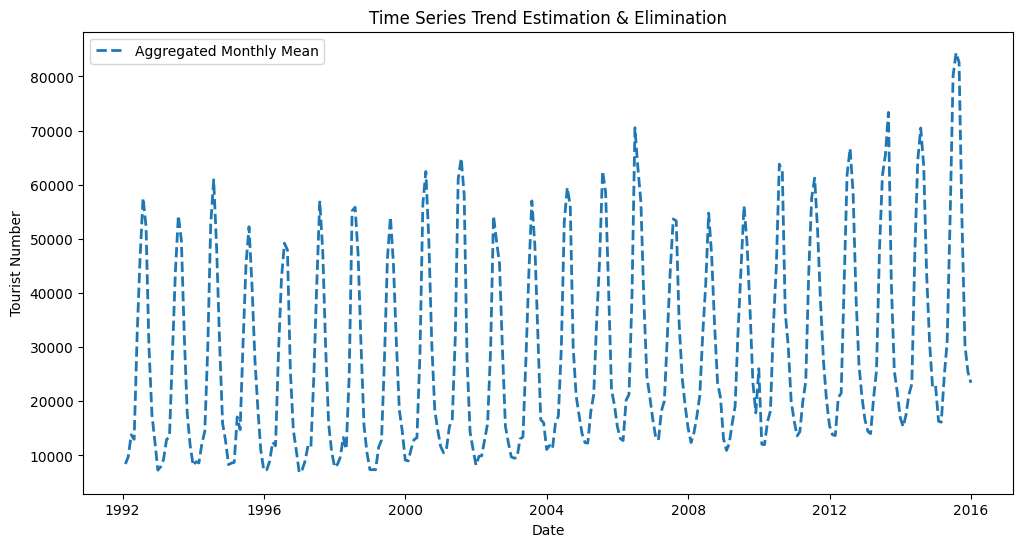

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['TouristNumber'], label='Aggregated Monthly Mean', linestyle='dashed', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Tourist Number')
plt.title('Time Series Trend Estimation & Elimination')
plt.legend()
plt.show()


In [18]:
df['Diff'] = df['TouristNumber'] - df['Smoothed']
df[['TouristNumber', 'Smoothed', 'Diff']].head()


,TouristNumber,Smoothed,Diff
Date,,,
1992-01-01,8414,NaN,NaN
1992-02-01,9767,NaN,NaN
1992-03-01,13805,NaN,NaN
1992-04-01,12987,25873.714286,-12886.714286
1992-05-01,32190,32137.571429,52.428571
